In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

from utils import get_data
from preprocessing import select_df_columns, df_interpolate_and_dropna

from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

from models import evaluate_model

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (15, 10)  # Change the default figure size

import seaborn as sns
sns.set()

In [54]:
%%time
df , df_raw = get_data('./data')

Wall time: 30.3 s


C:\Users\matte\Documents\TAG\ProjectWork\utils.py:112: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_temp = df_temp.set_index("datetime")[["Temperatura"]].loc["2014":].resample('H').last()


In [5]:
del df_raw

In [6]:
df_prep = df.pipe(select_df_columns, ["ET_rete (potenza_termica_oraria)"])\
    .pipe(df_interpolate_and_dropna)

In [7]:
del df

In [8]:
df_train = df_prep[["ET_rete (potenza_termica_oraria)"]][:"2019"]
df_test = df_prep[["ET_rete (potenza_termica_oraria)"]]["2020":]
df_train["ET_rete (potenza_termica_oraria)"] = ssc.fit_transform(df_train)
df_test["ET_rete (potenza_termica_oraria)"] = ssc.transform(df_test.values.reshape(-1,1))

In [9]:
df_train.values

array([[-0.49377027],
       [-0.48636299],
       [-0.50117756],
       ...,
       [ 1.41310561],
       [ 1.06216706],
       [ 0.7291667 ]])

In [45]:
%%time
model = SARIMAX(endog=df_train.values, order=(0, 0, 0), seasonal_order=(1, 0, 1, 24))

Wall time: 20 ms


In [46]:
%%time
model_fit = model.fit()

Wall time: 43.2 s


In [47]:
results = model_fit.forecast(48)

In [48]:
results = ssc.inverse_transform(results)

In [49]:
evaluate_model(results, ssc.inverse_transform(df_test.iloc[:48].values))

mse = 536.341455826424
r2_score = 0.7688326644797532
mape = 25.977944412772636
mae = 18.505252692383053


In [44]:
evaluate_model(results, ssc.inverse_transform(df_test.iloc[:48].values))

mse = 3225.456922528276
r2_score = 0.22380109039828722
mape = 25.97218410403746
mae = 47.62743802597263


In [39]:
evaluate_model(results, ssc.inverse_transform(df_test.iloc[:48].values))

mse = 570.7614694449817
r2_score = 0.8318182956143779
mape = 26.265872639079834
mae = 19.48356200761035


In [19]:
evaluate_model(results, df_test.iloc[:48].values)

mse = 0.10265982553254882
r2_score = 0.43594135883031226
mape = 48.296006902244926
mae = 0.25350212877100226


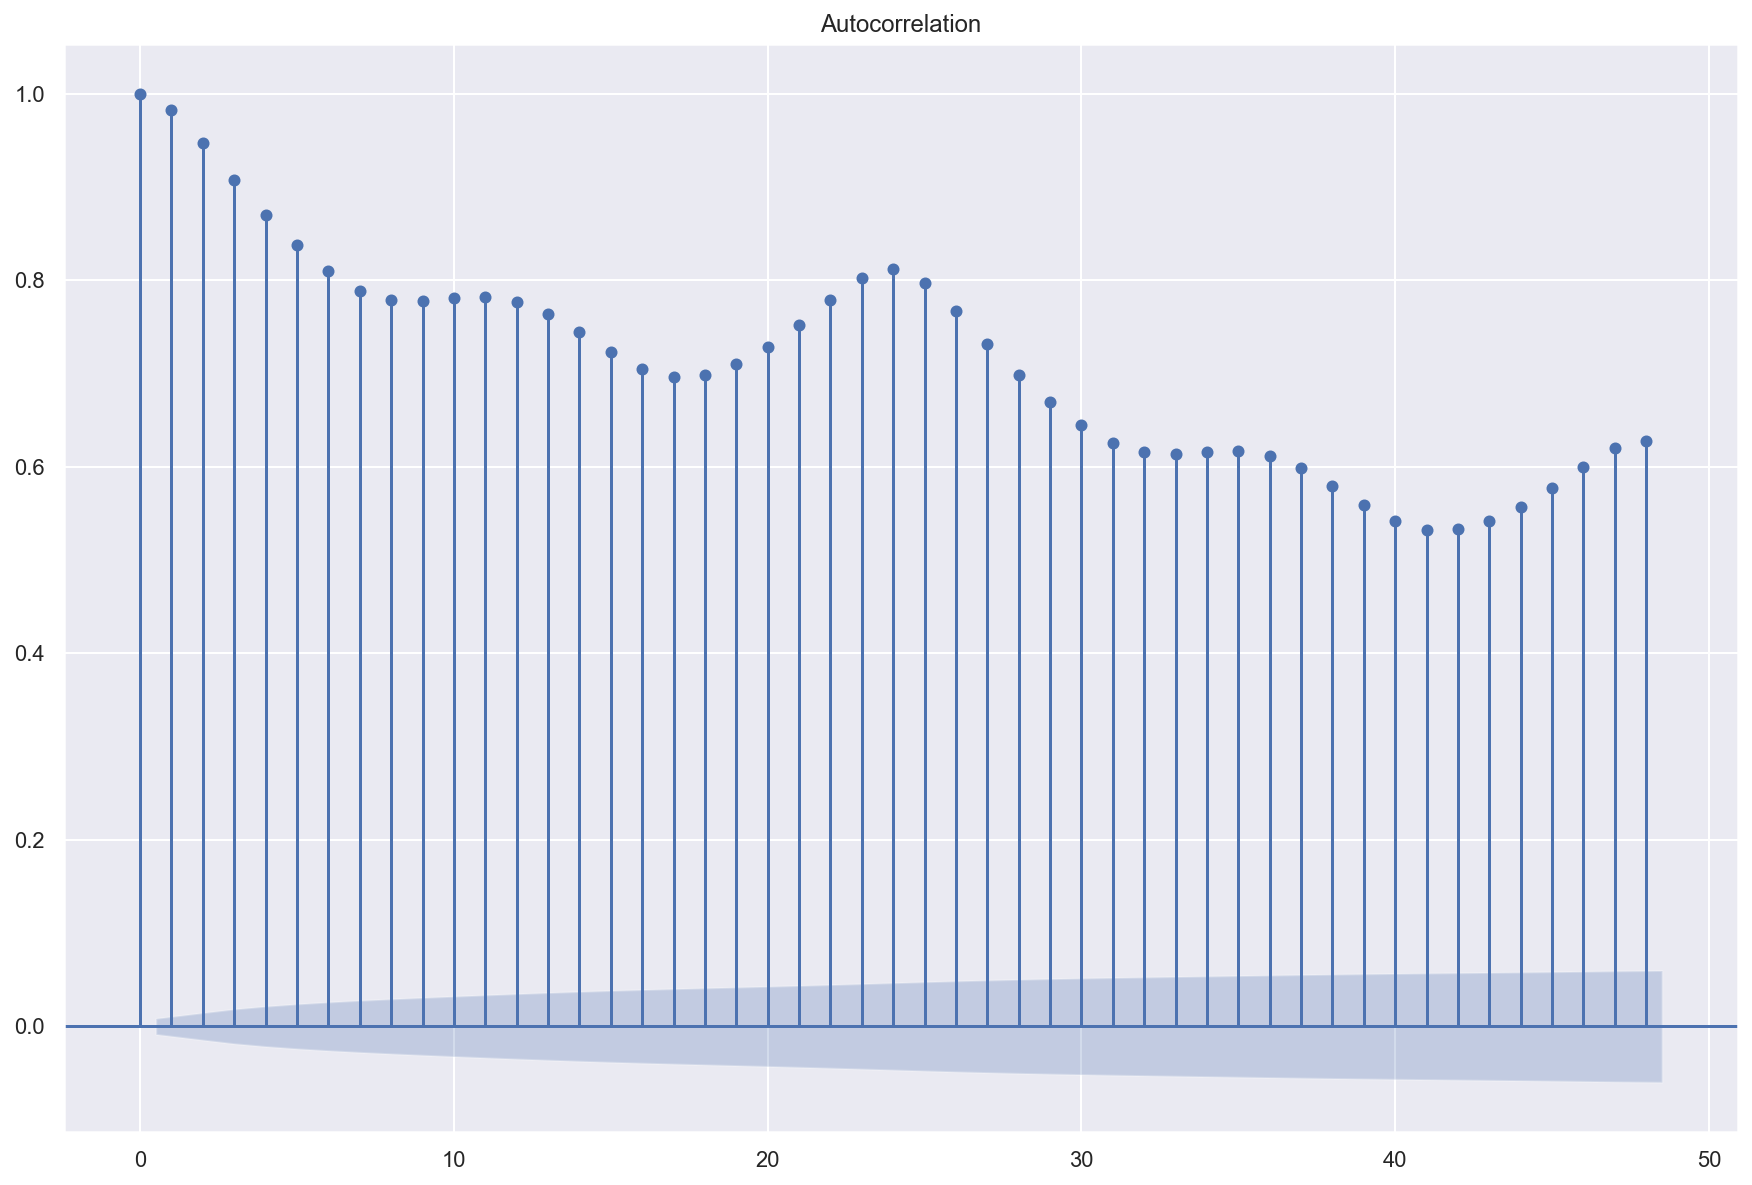

In [21]:
plot_acf(df_train.resample("H").mean());

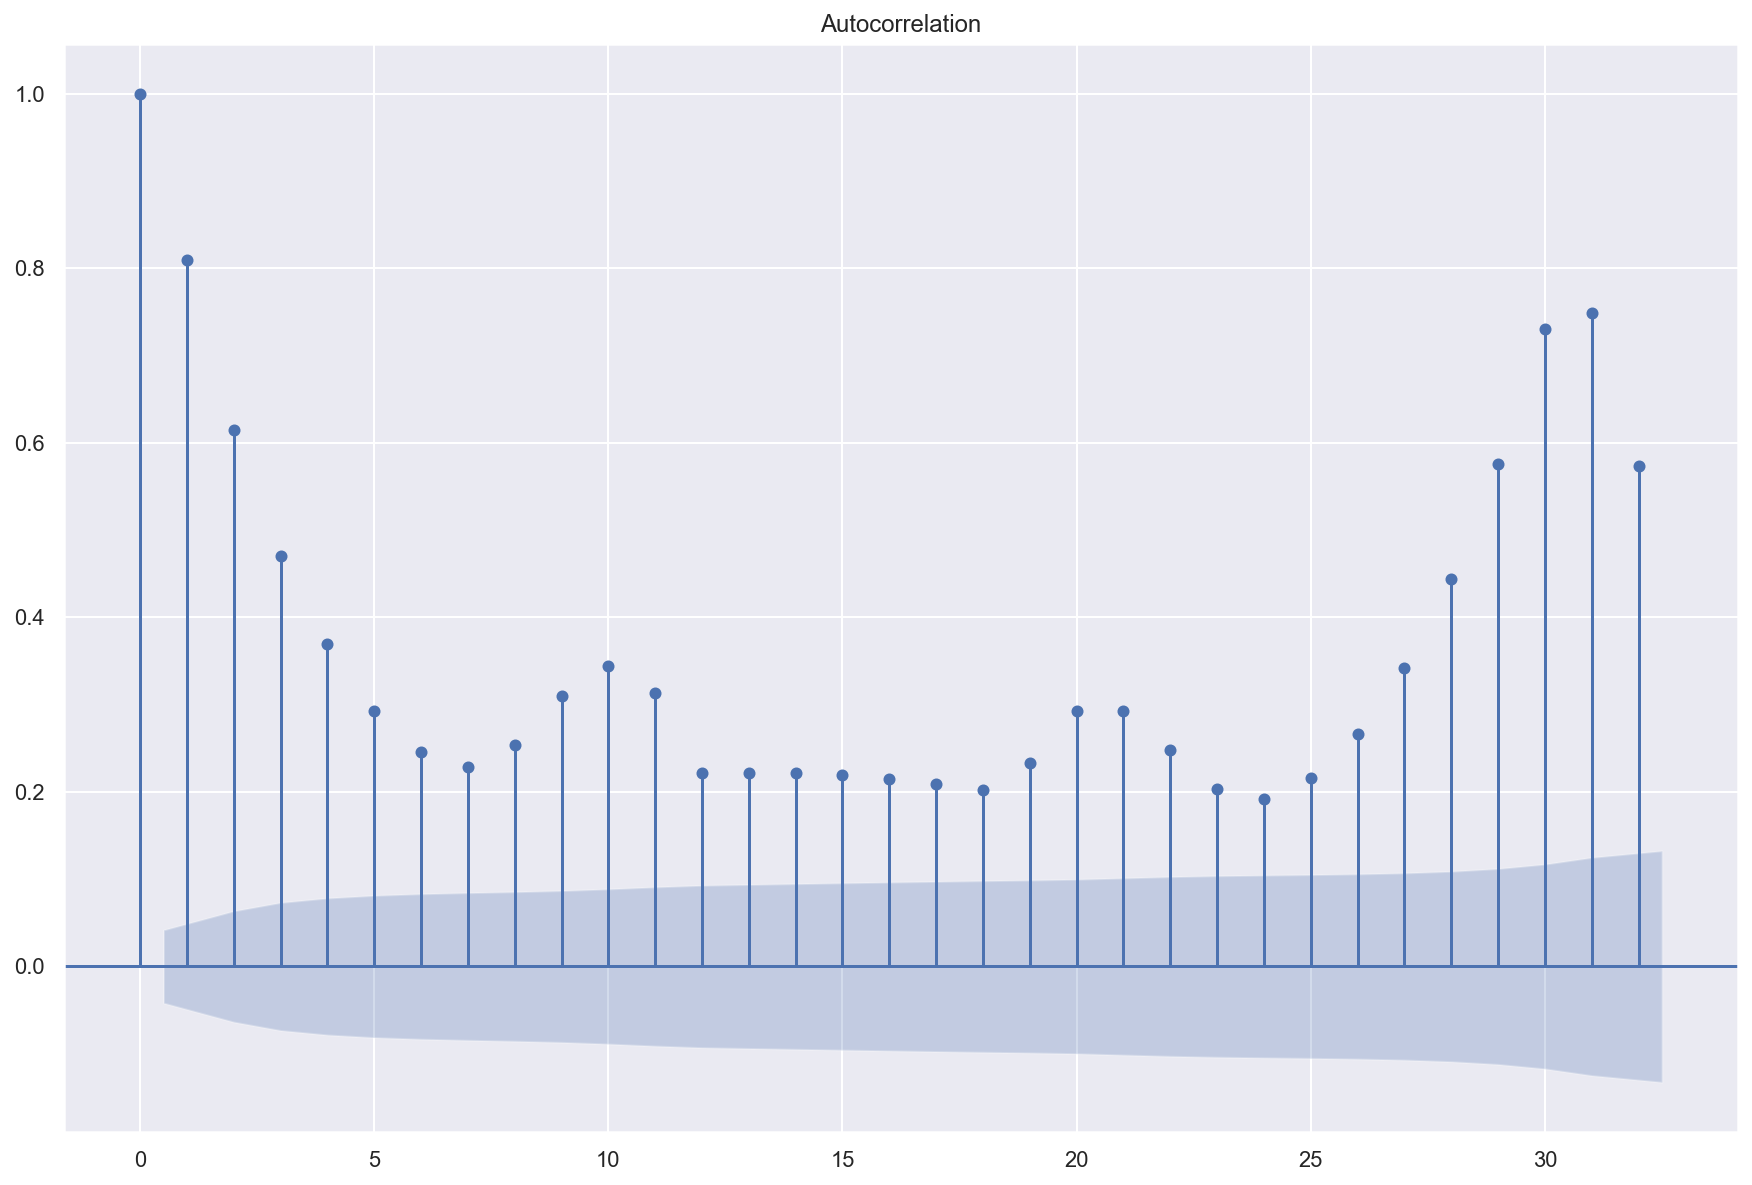

In [51]:
plot_acf(df_prep[["ET_rete (potenza_termica_oraria)"]][:"2019"].resample("D").mean());

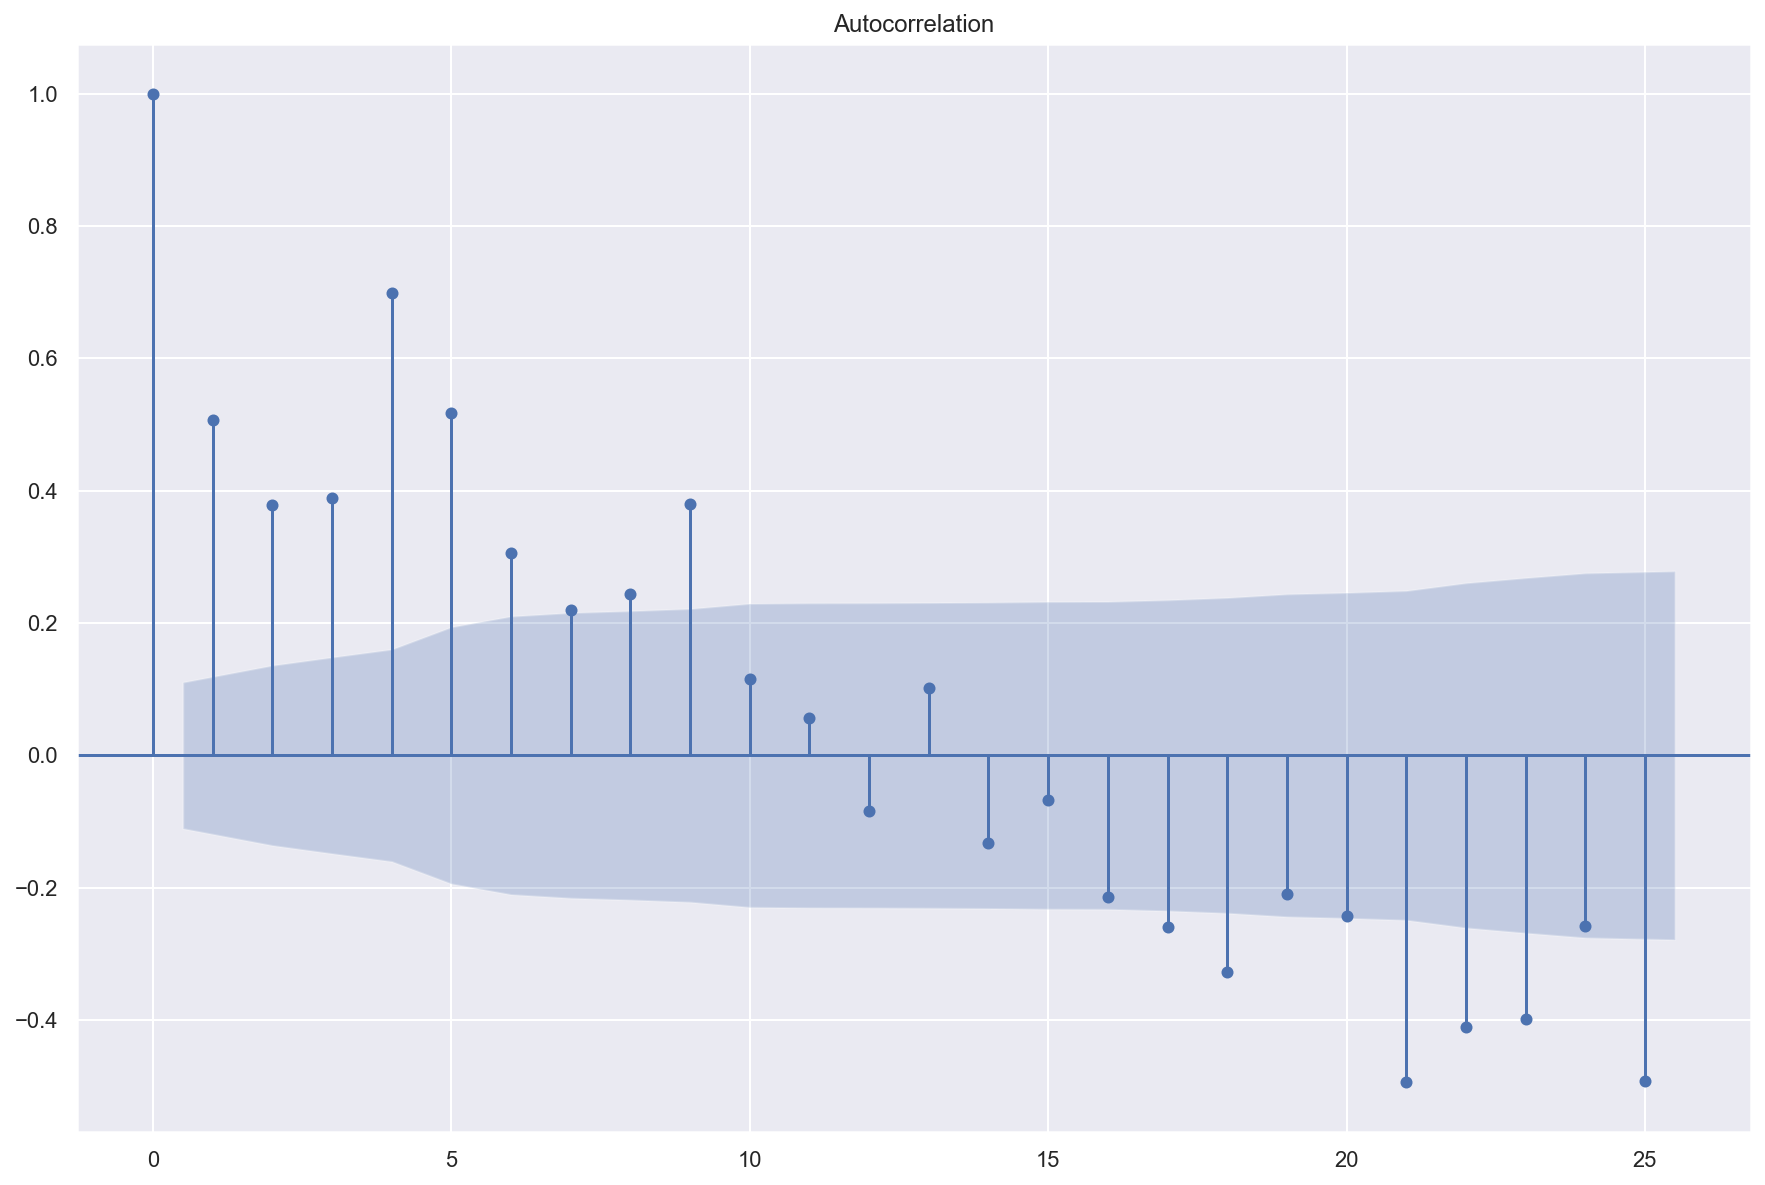

In [23]:
plot_acf(df_train.resample("W").mean());

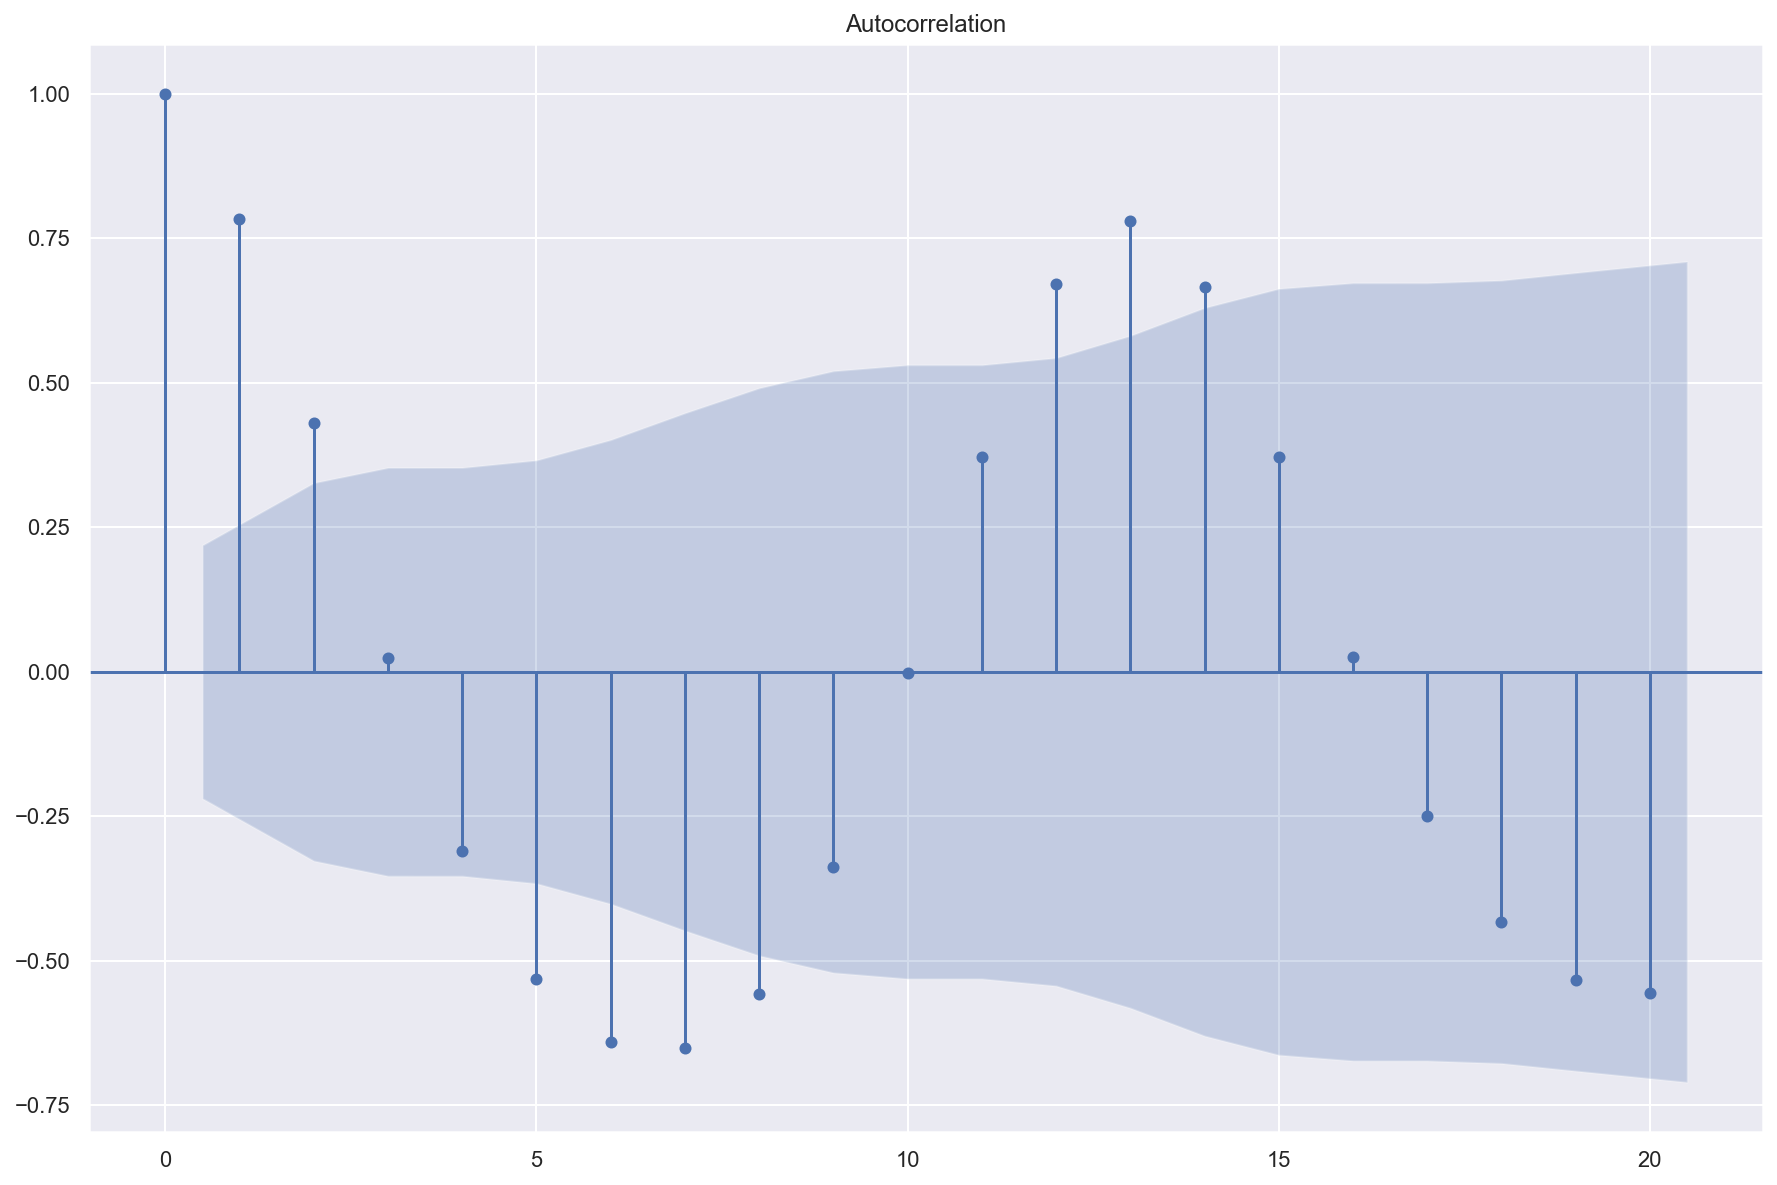

In [24]:
plot_acf(df_train.resample("4W").mean());

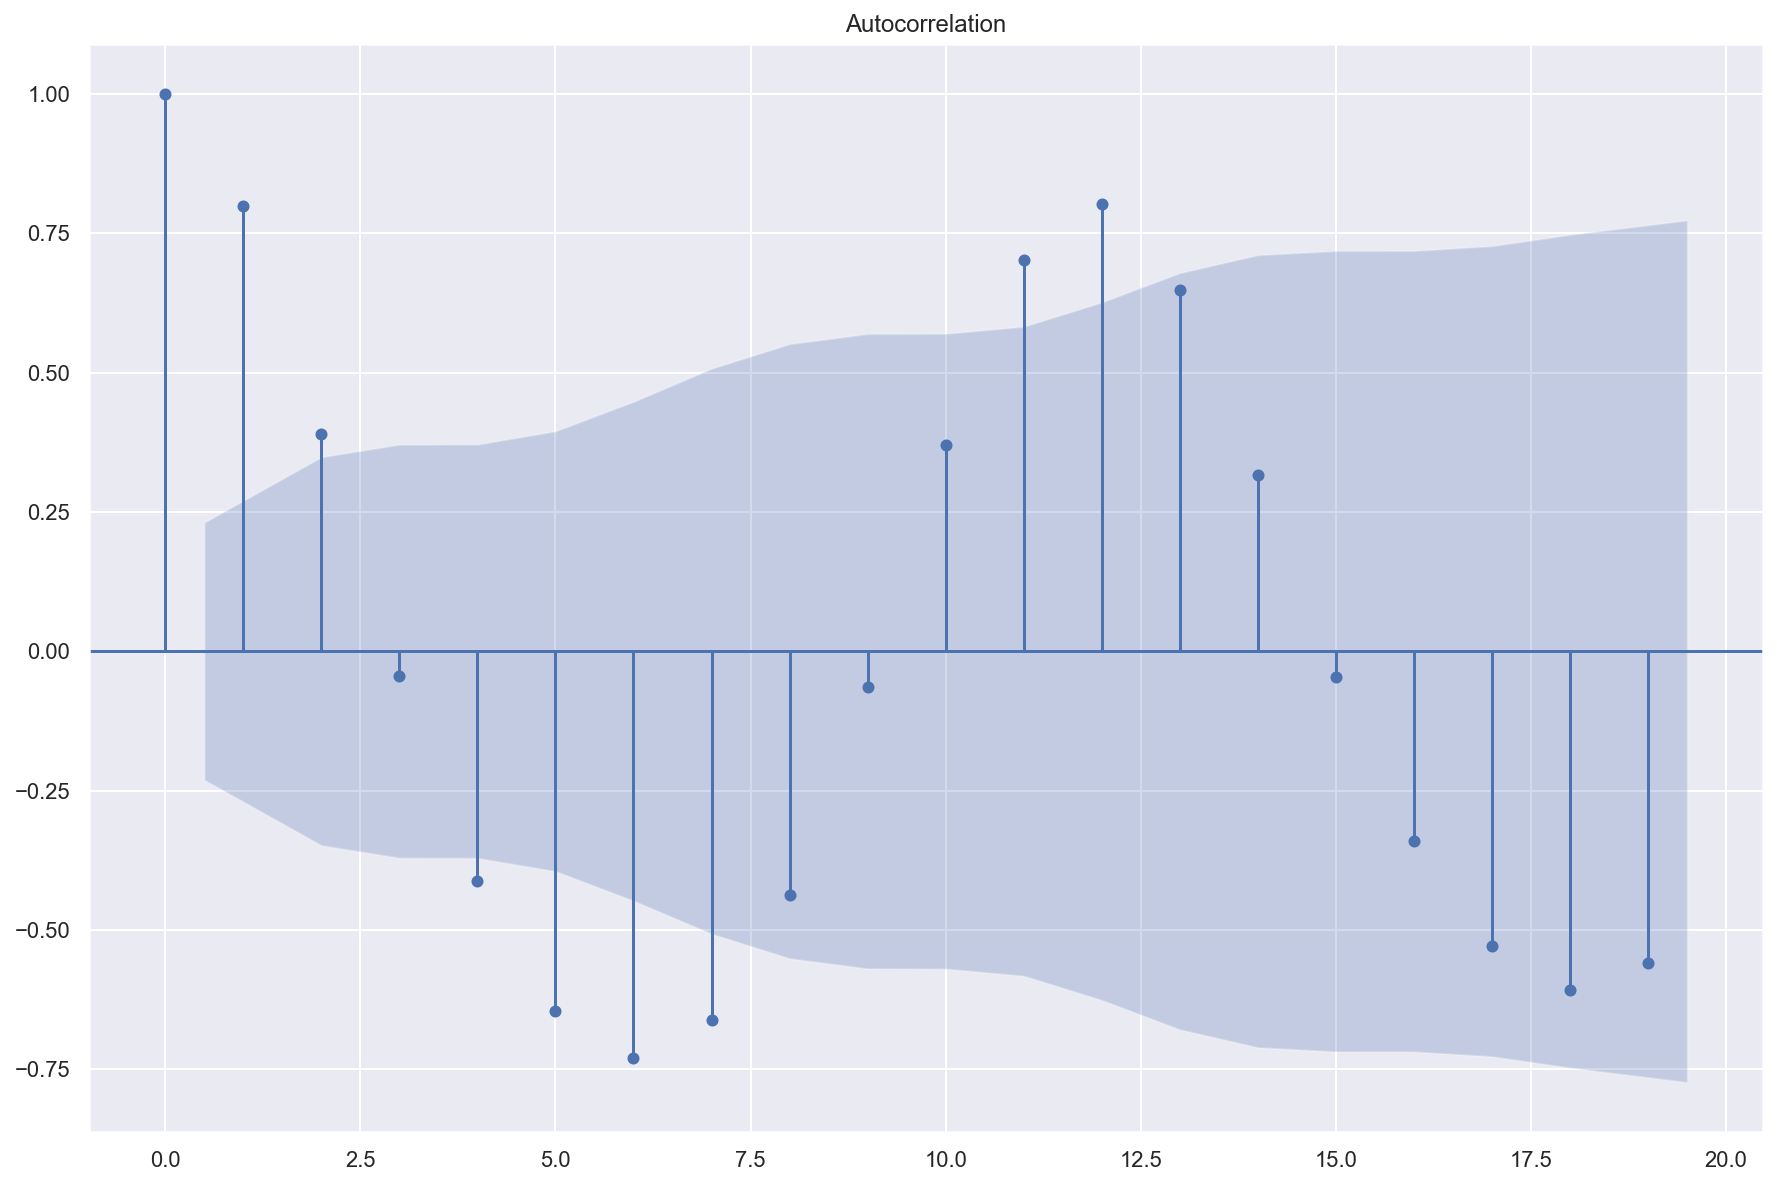

In [25]:
plot_acf(df_train.resample("M").mean());

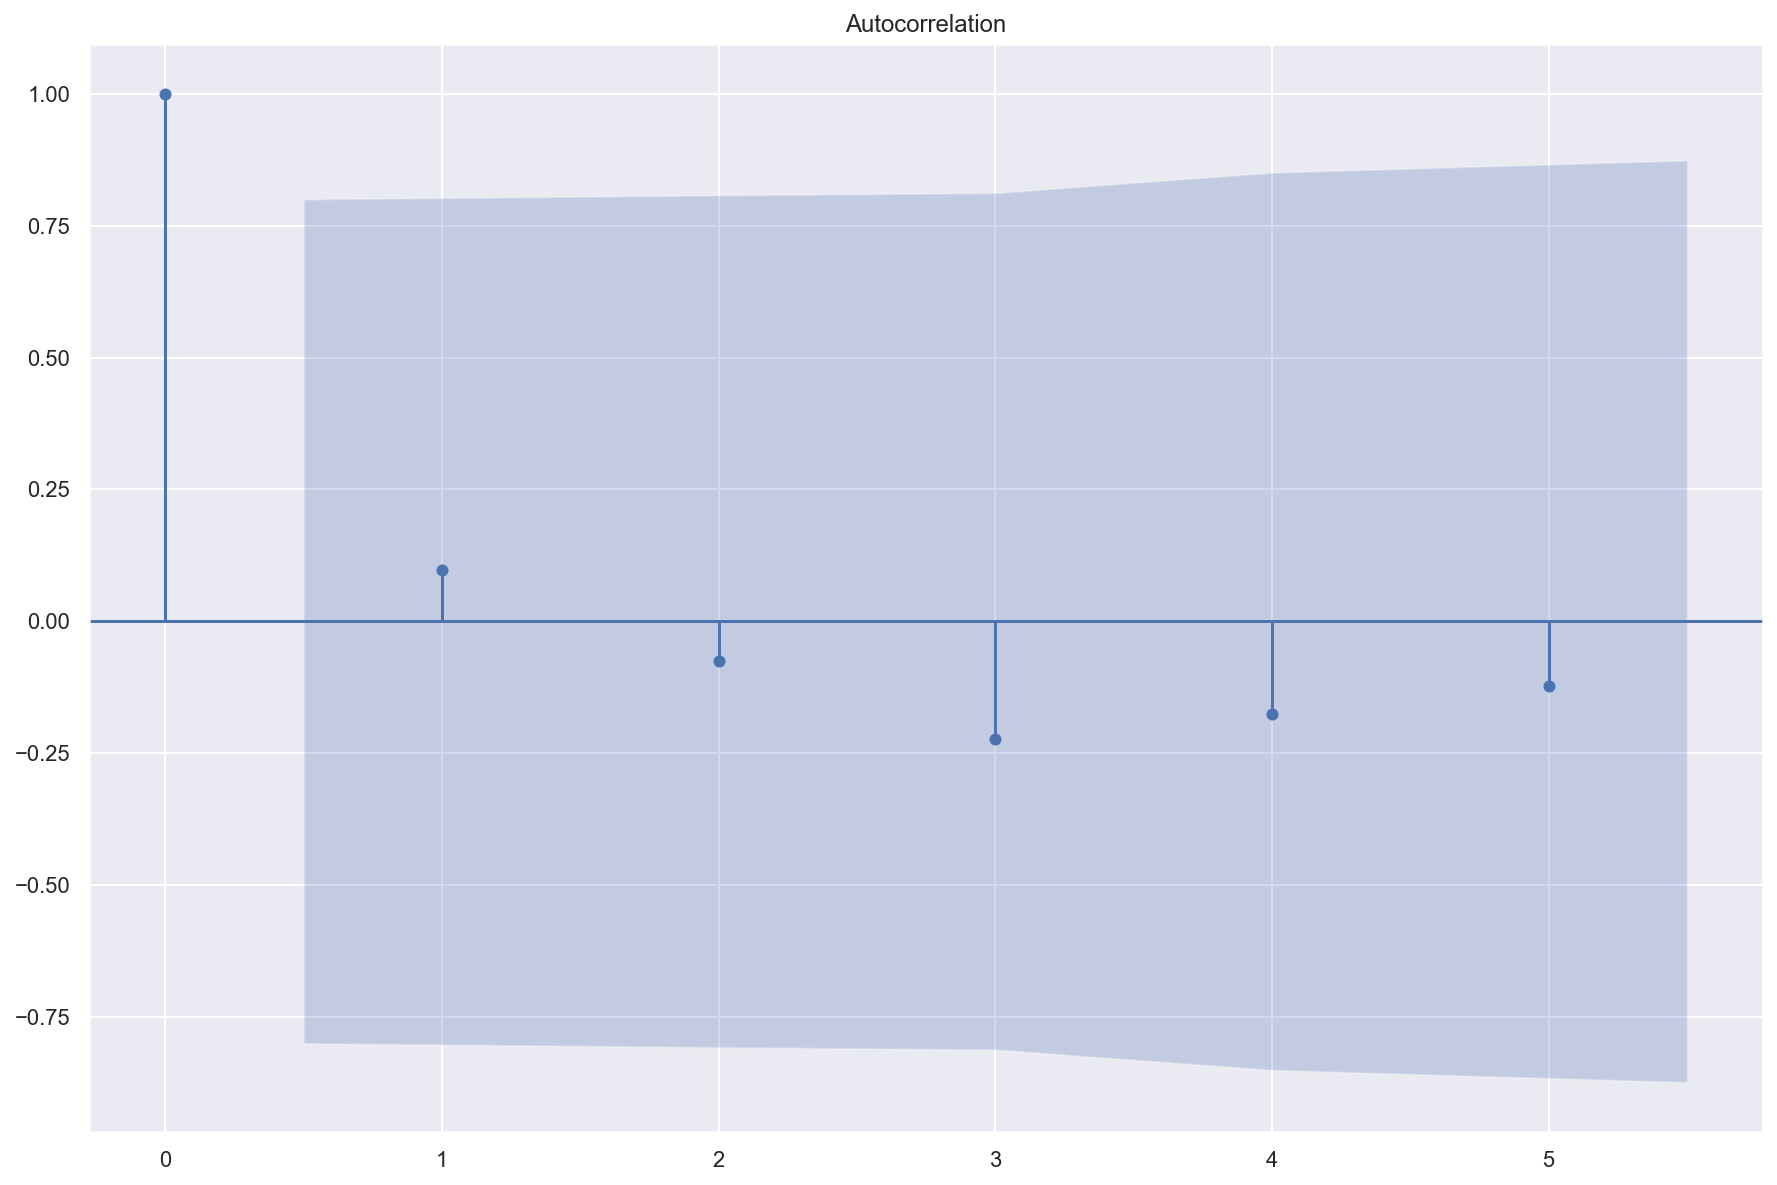

In [26]:
plot_acf(df_train.resample("Y").mean());

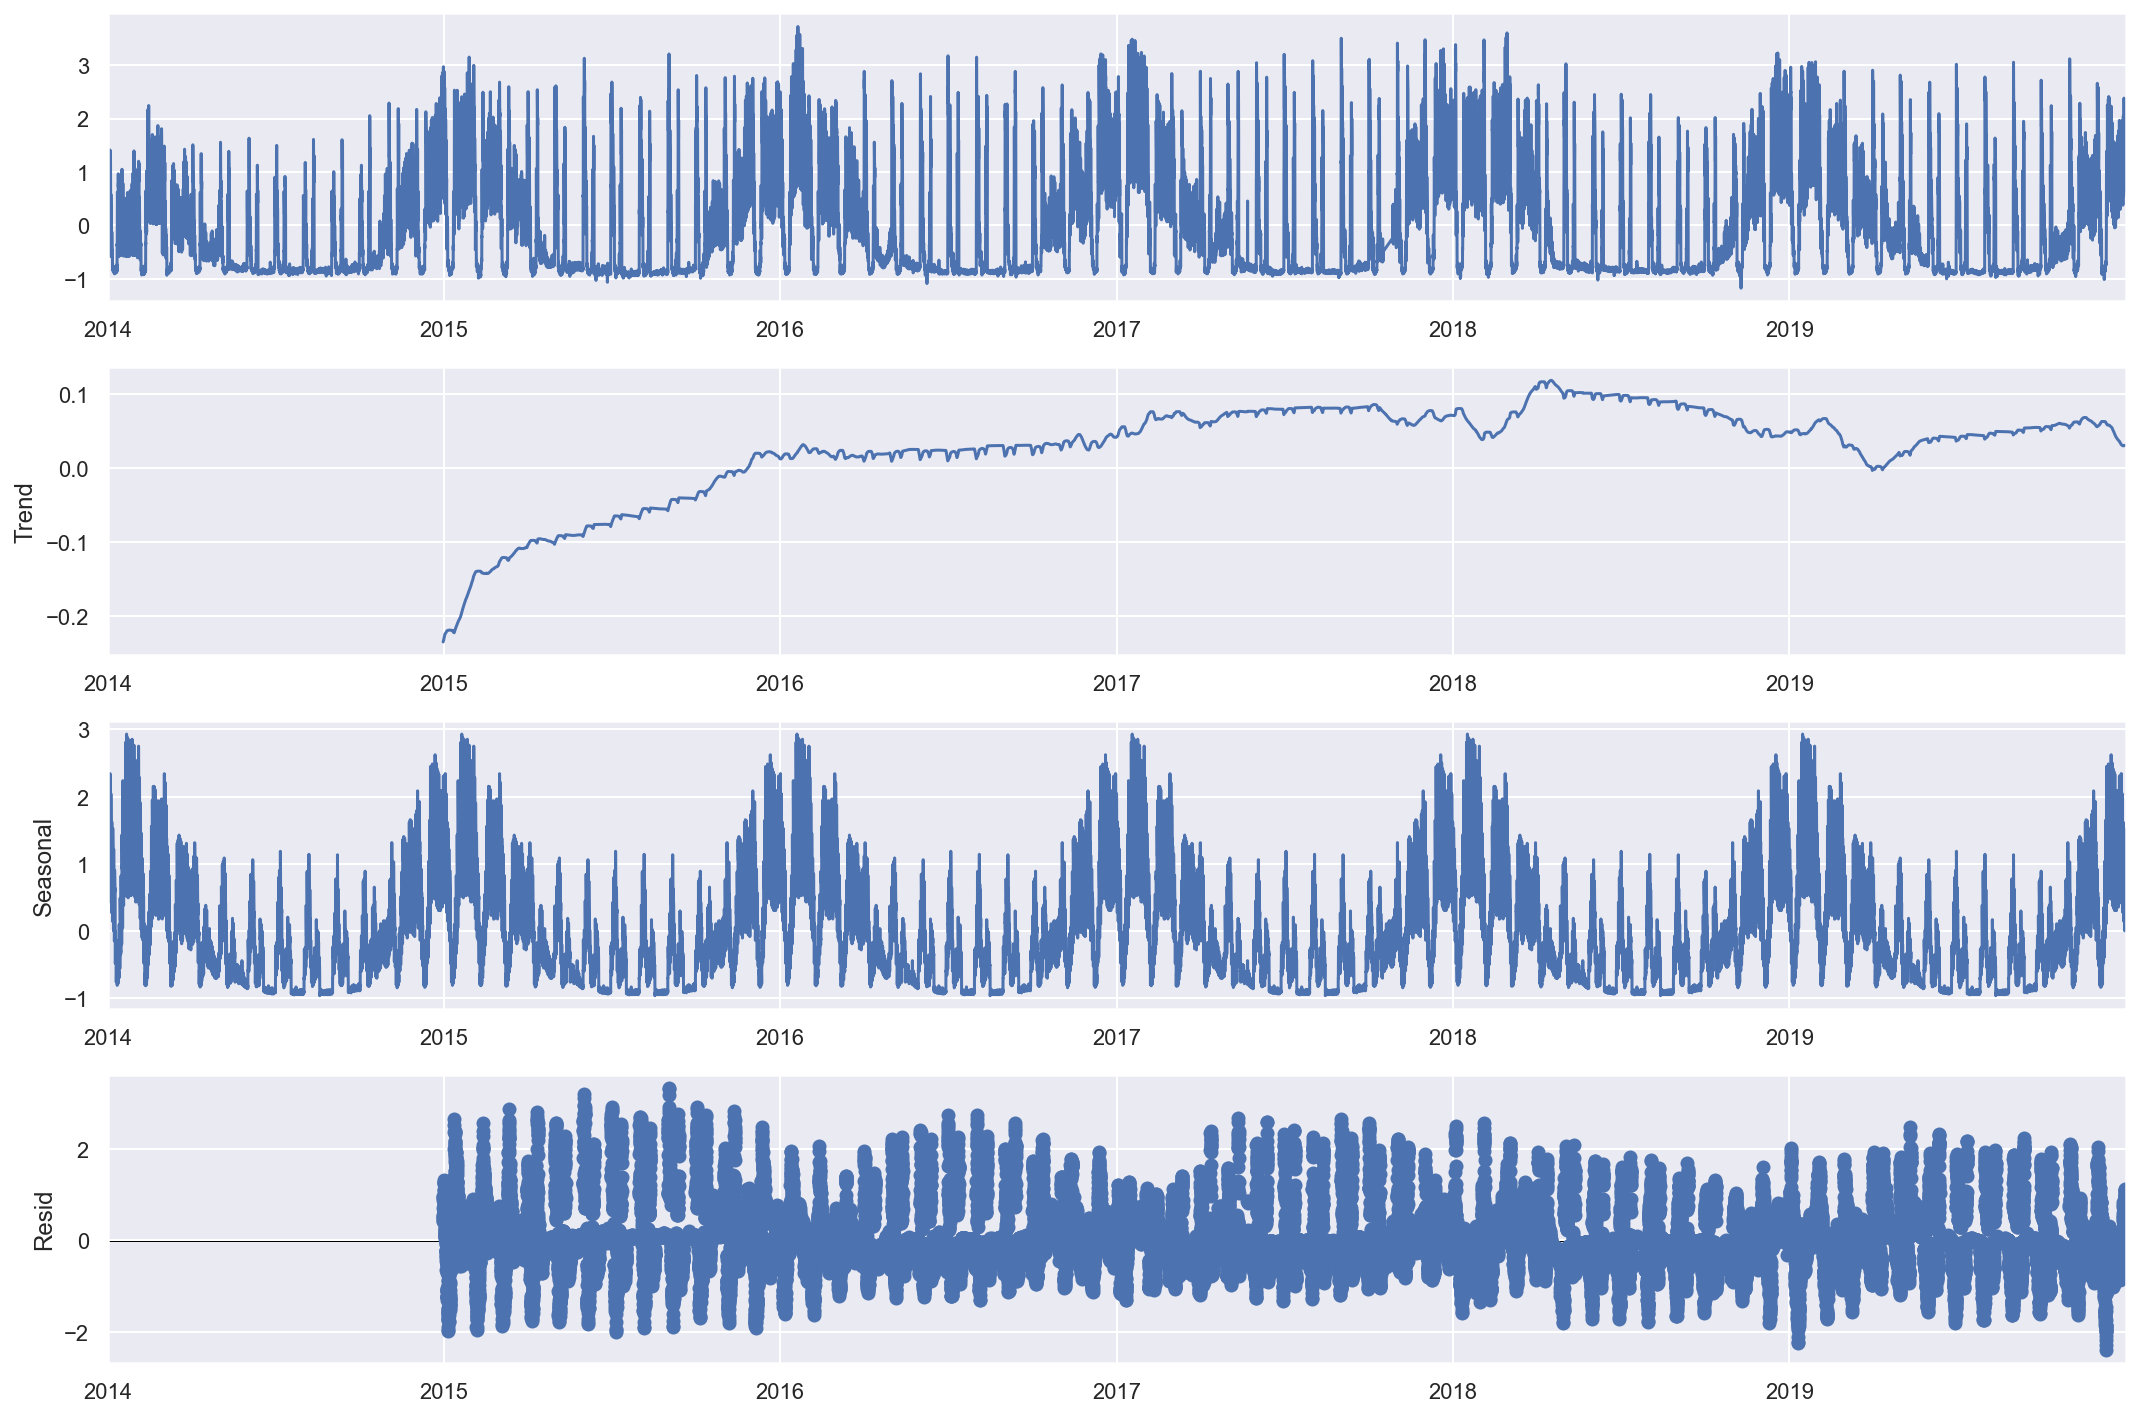

In [27]:
seasonal_decompose(df_train, period=24*7*52, two_sided=False).plot();

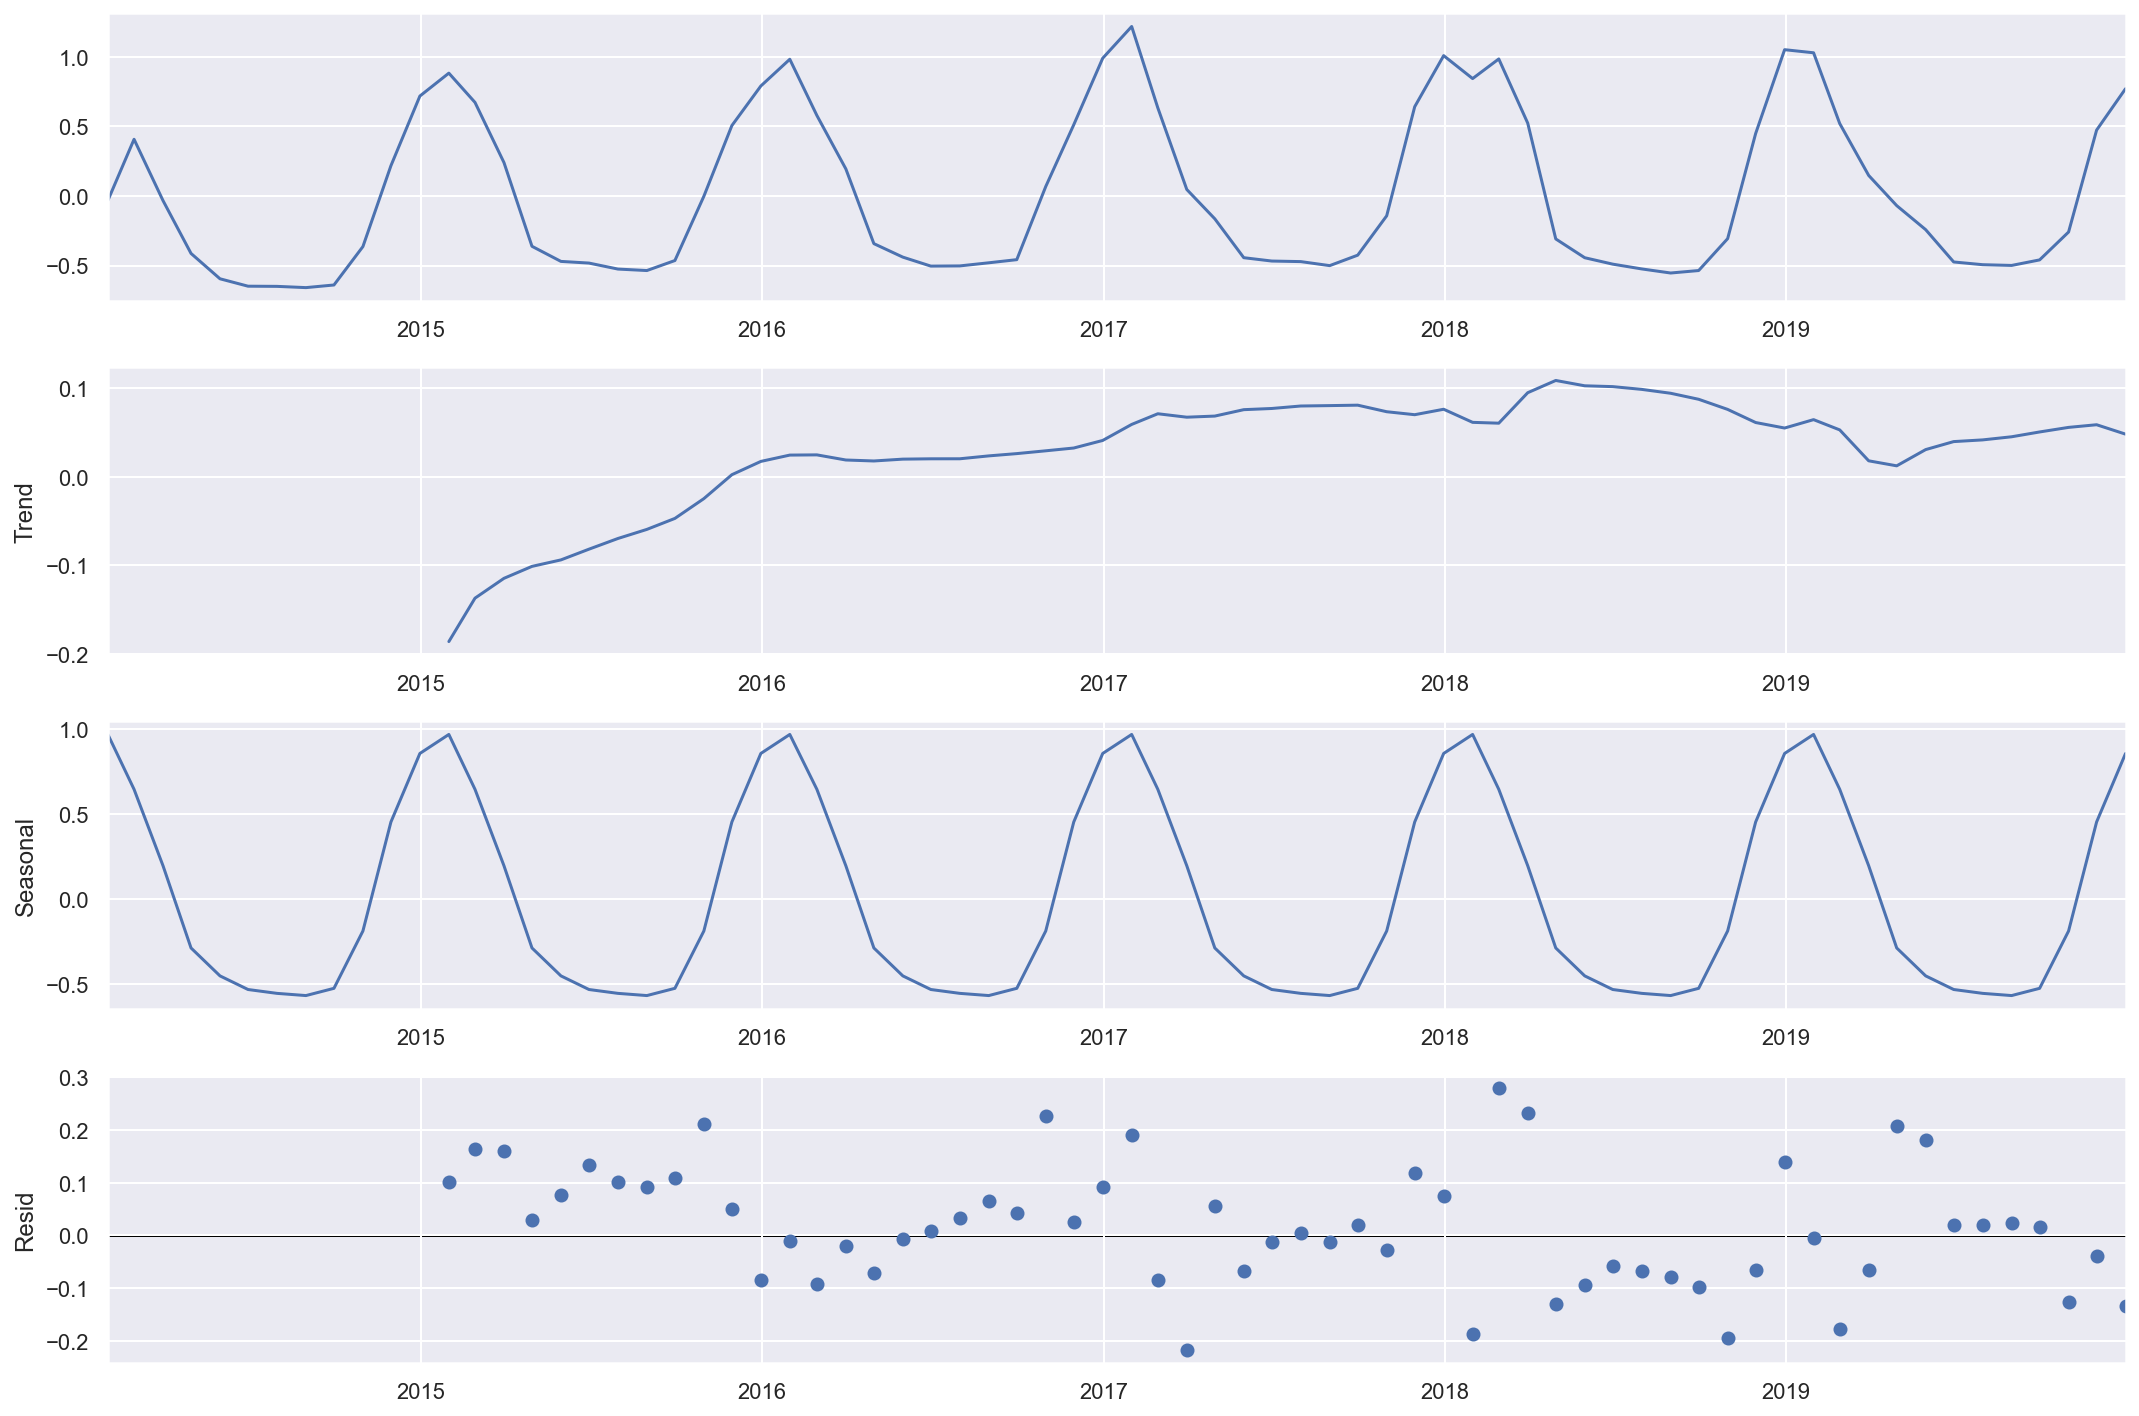

In [28]:
seasonal_decompose(df_train.resample("M").mean(), two_sided=False).plot();

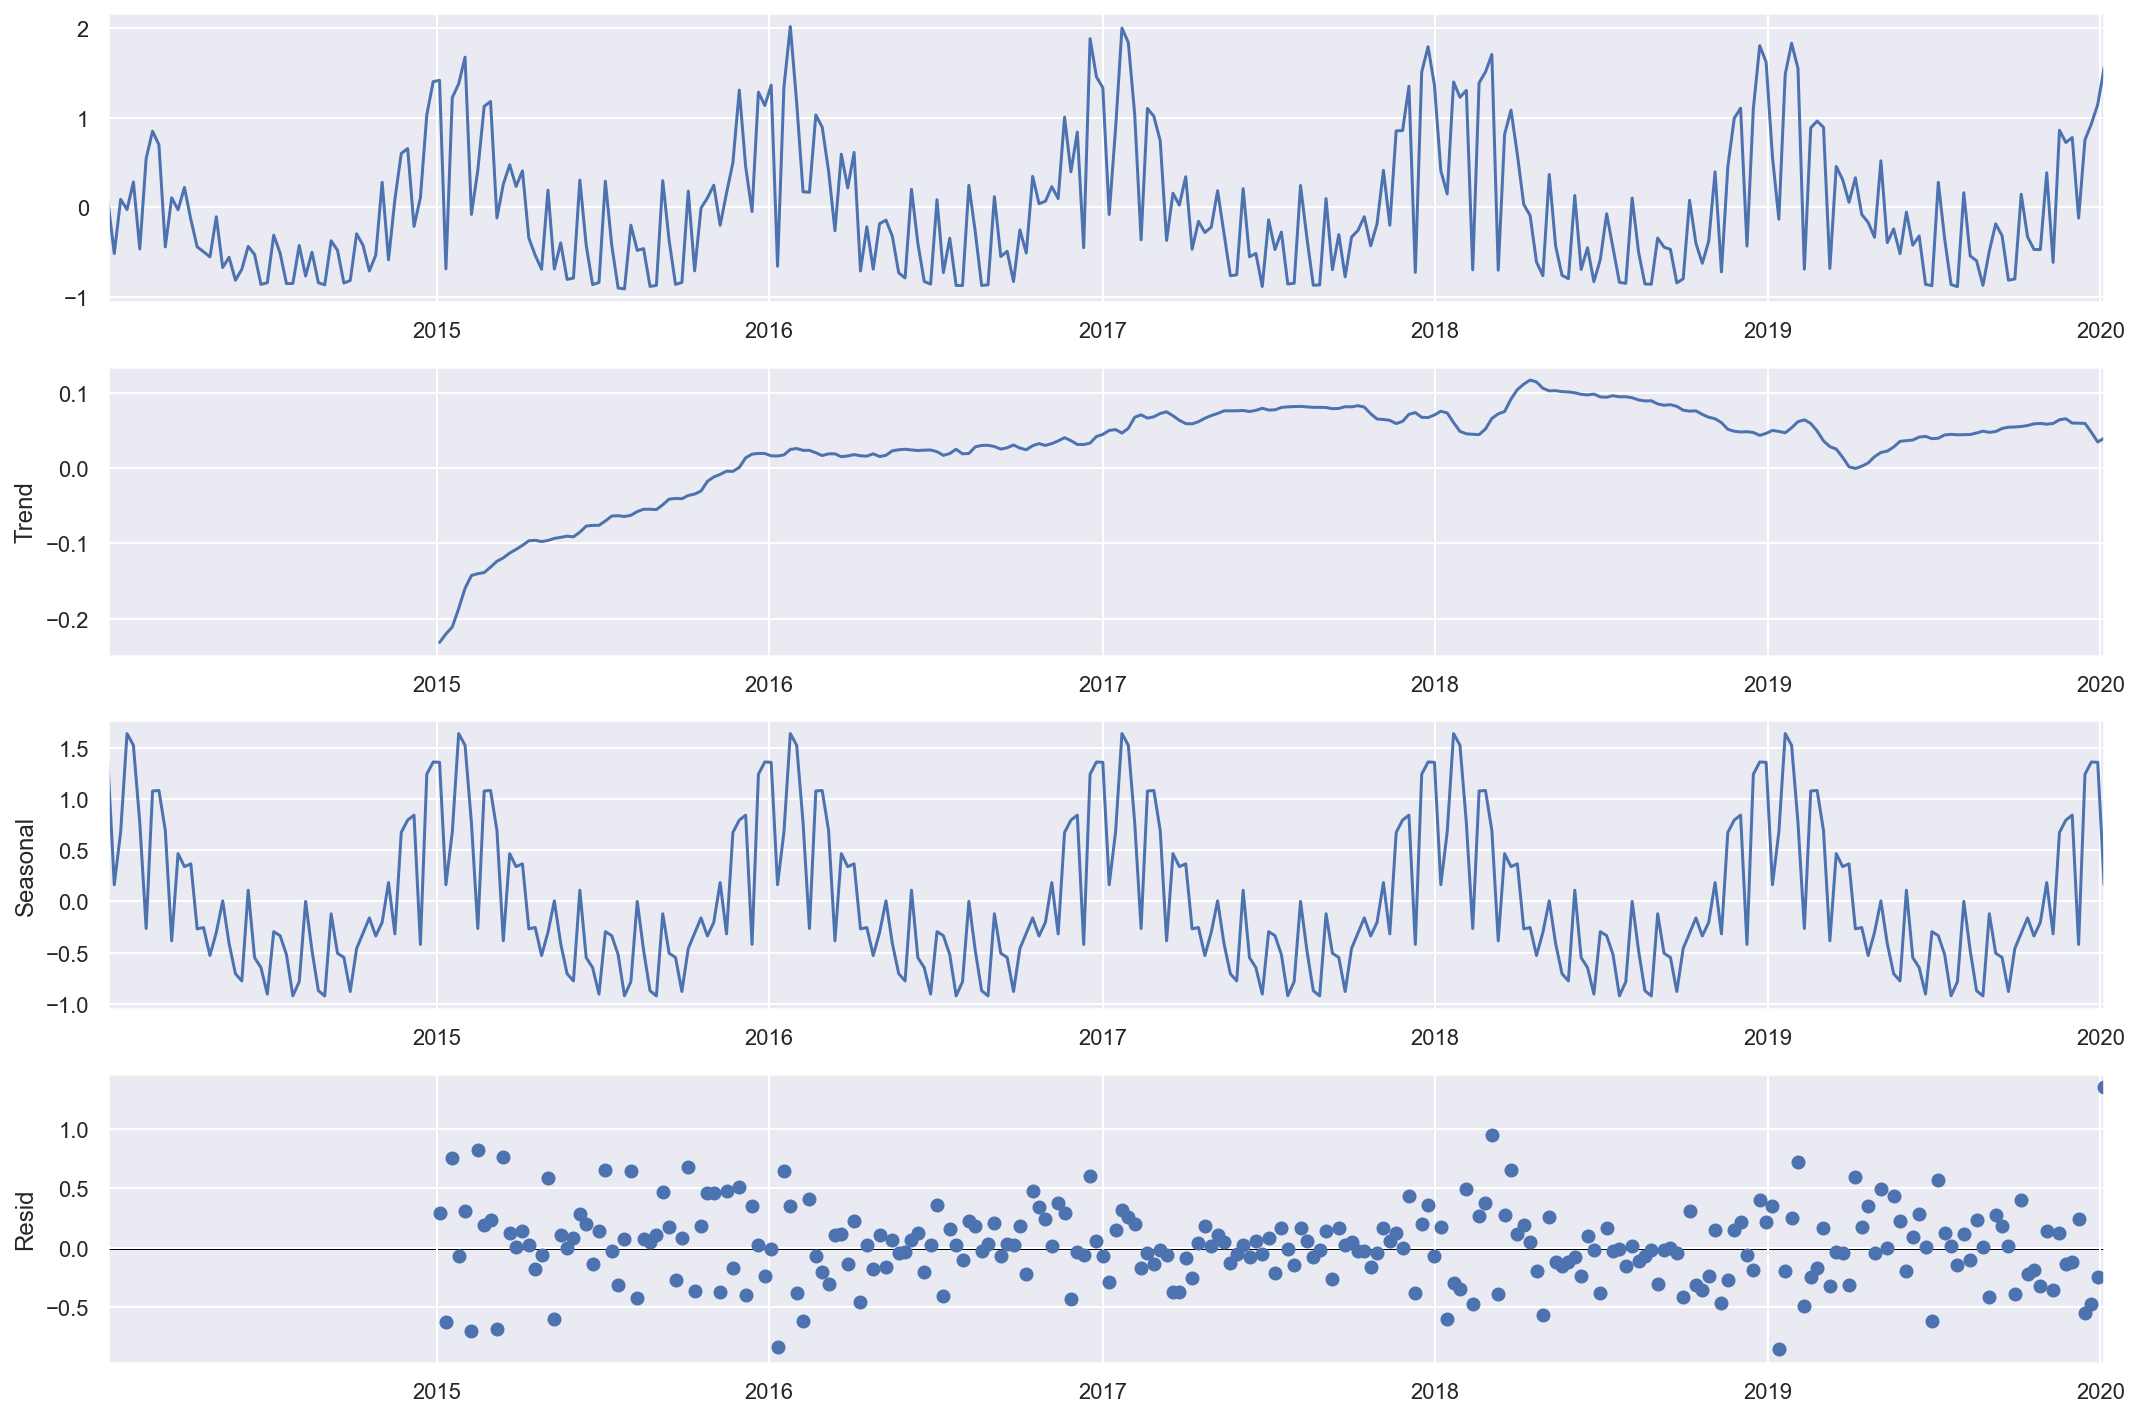

In [29]:
seasonal_decompose(df_train.resample("W").mean(), two_sided=False).plot();

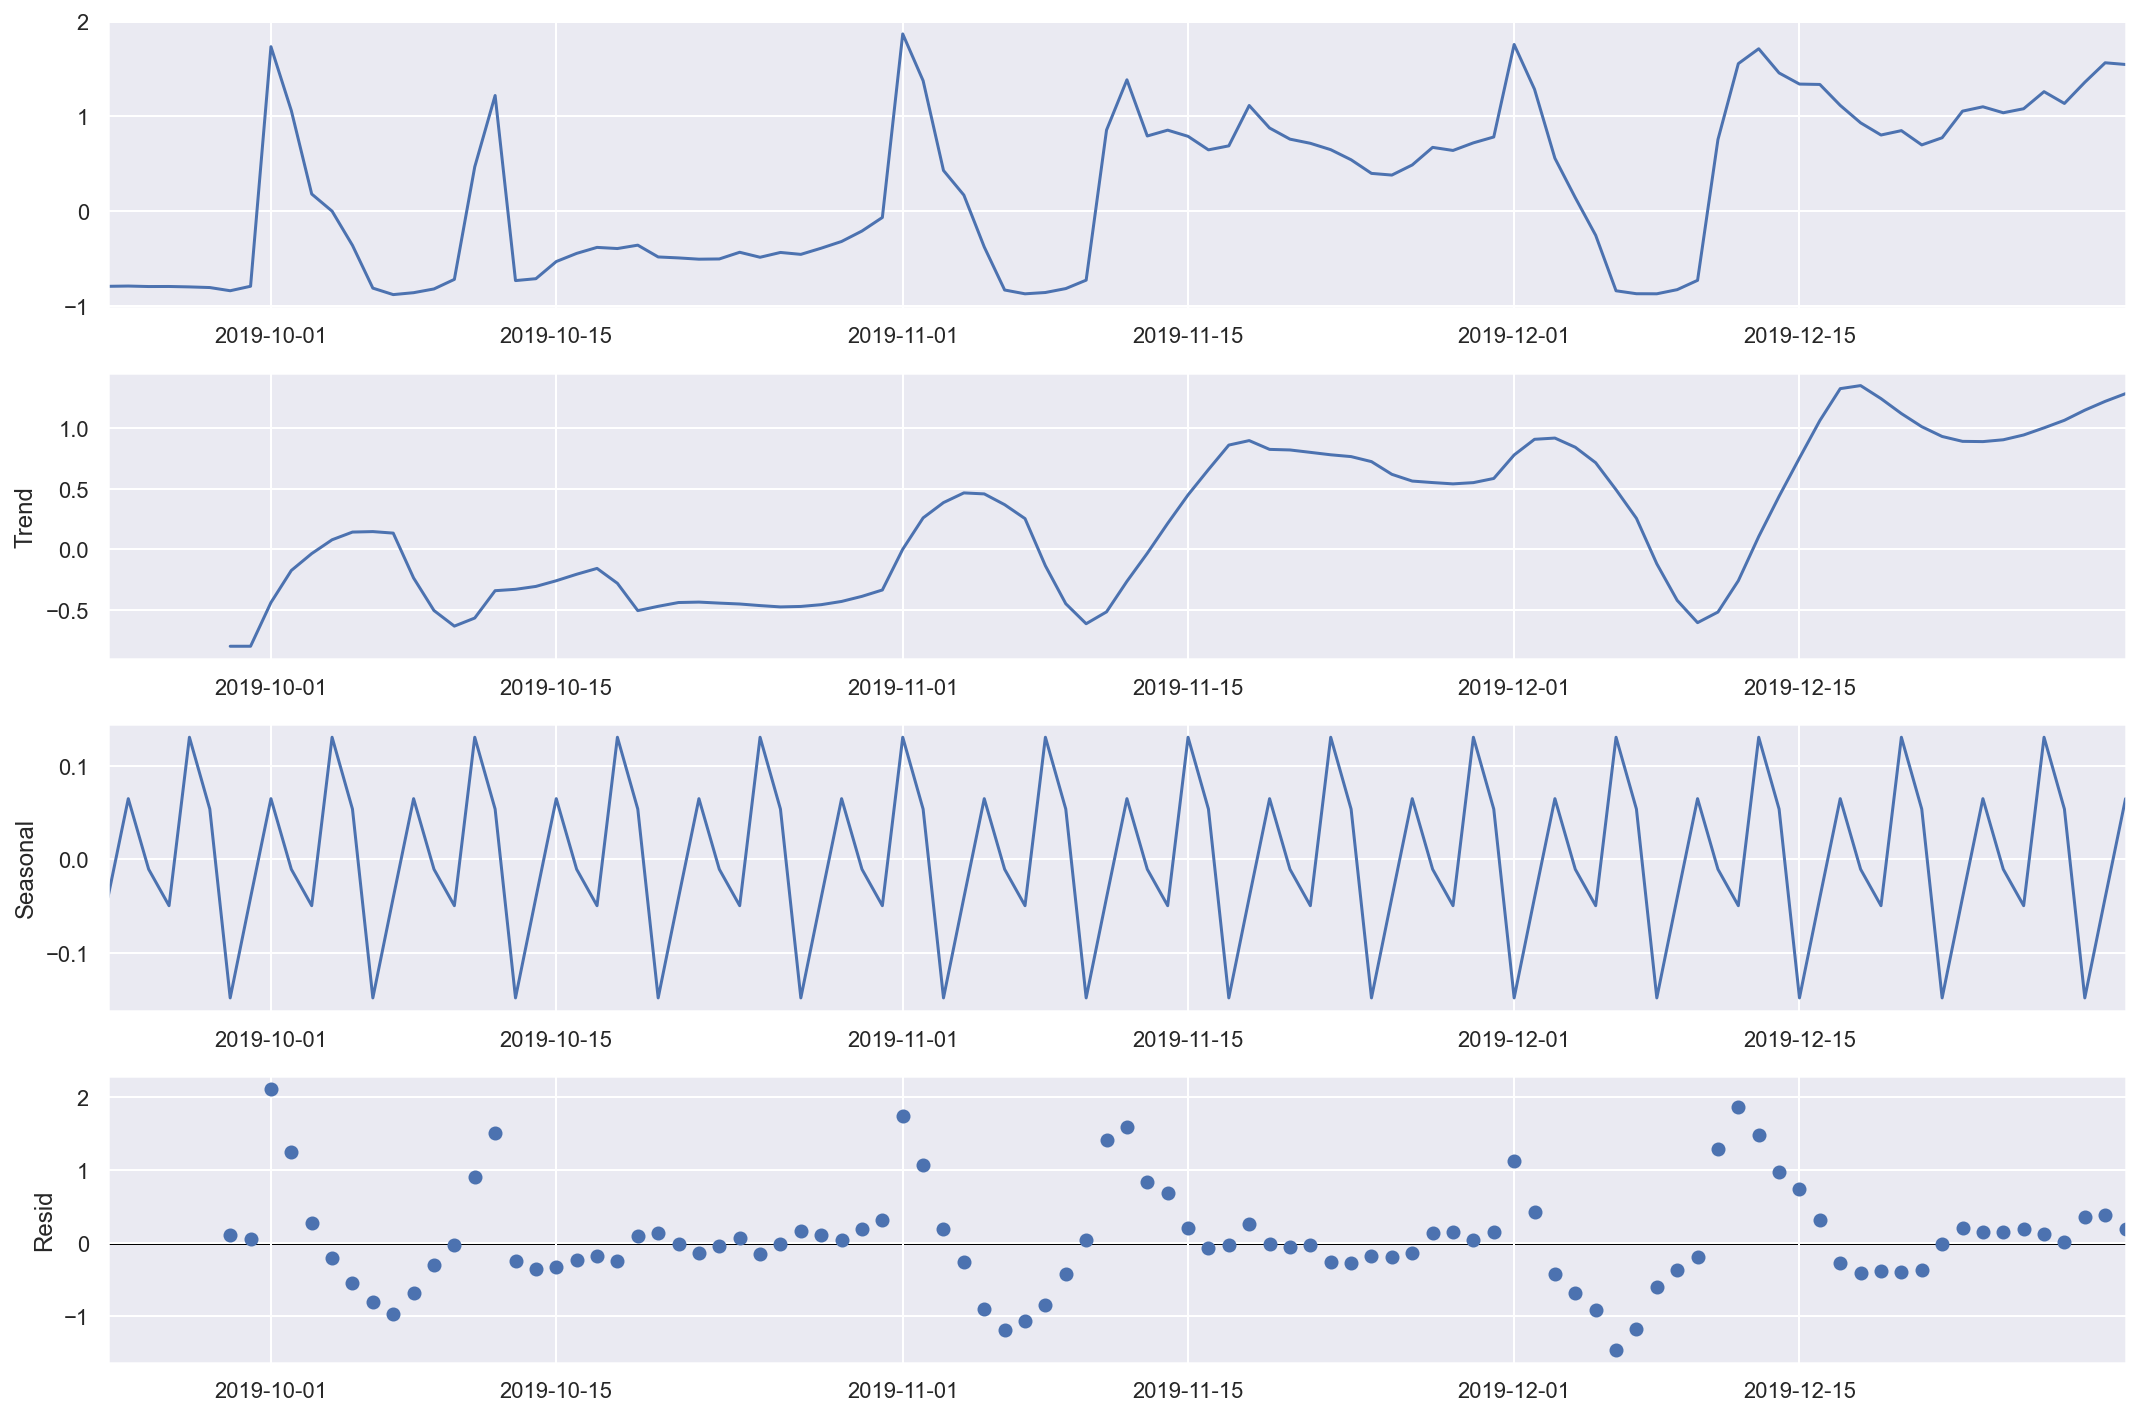

In [30]:
seasonal_decompose(df_train.resample("D").mean().iloc[-100:], two_sided=False).plot();

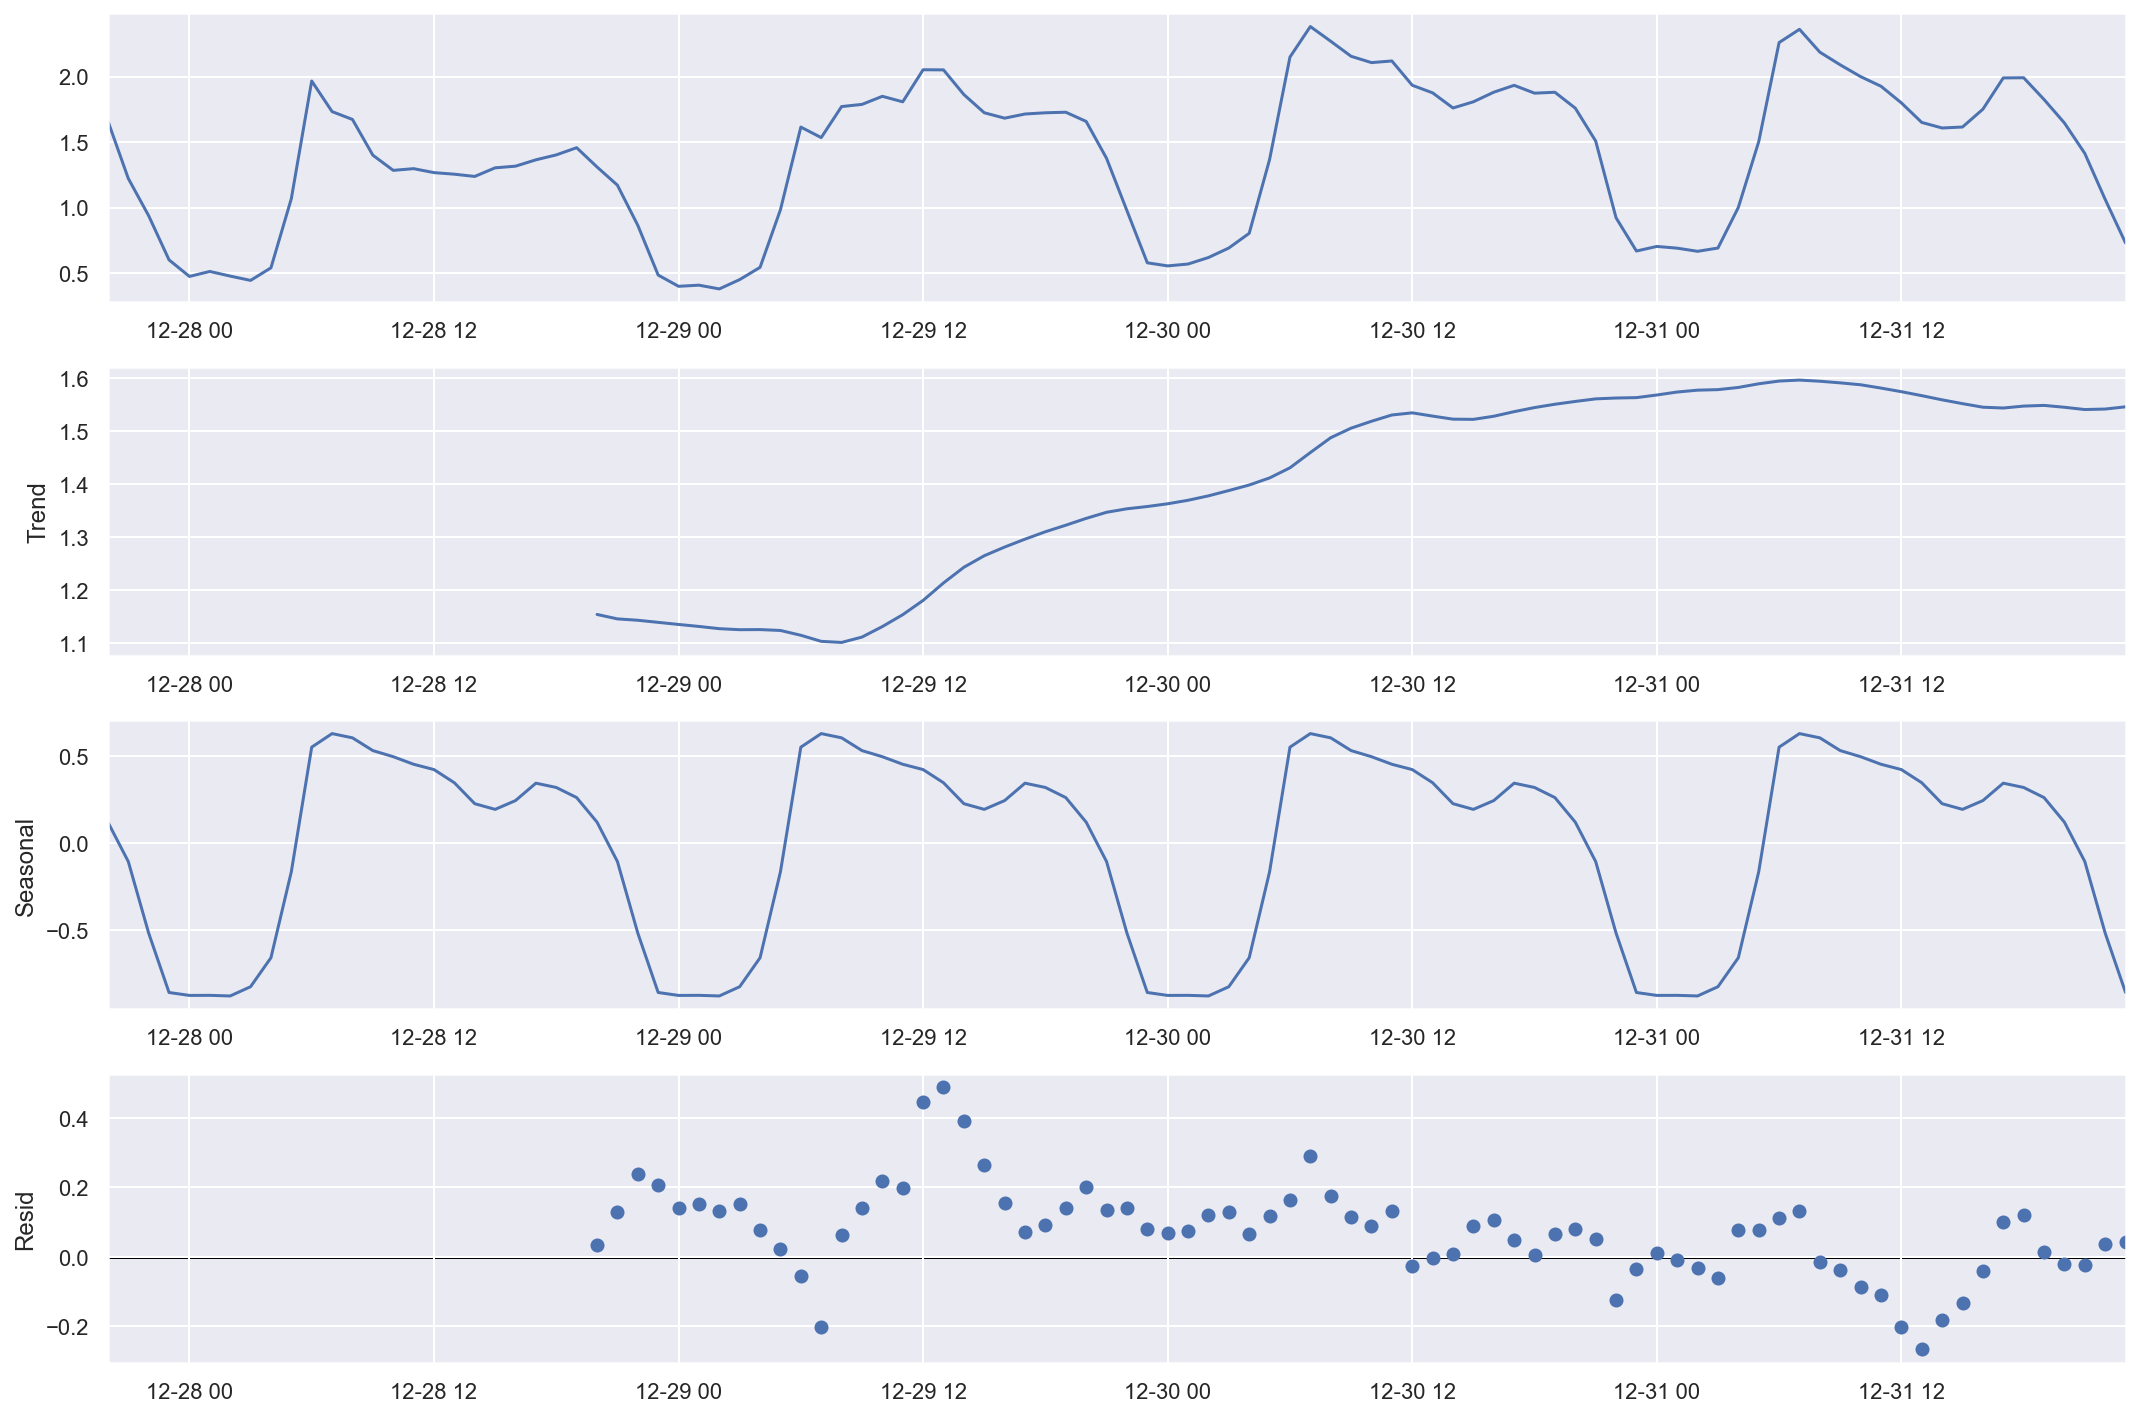

In [31]:
seasonal_decompose(df_train.resample("H").mean().iloc[-100:], two_sided=False).plot();

<AxesSubplot:>

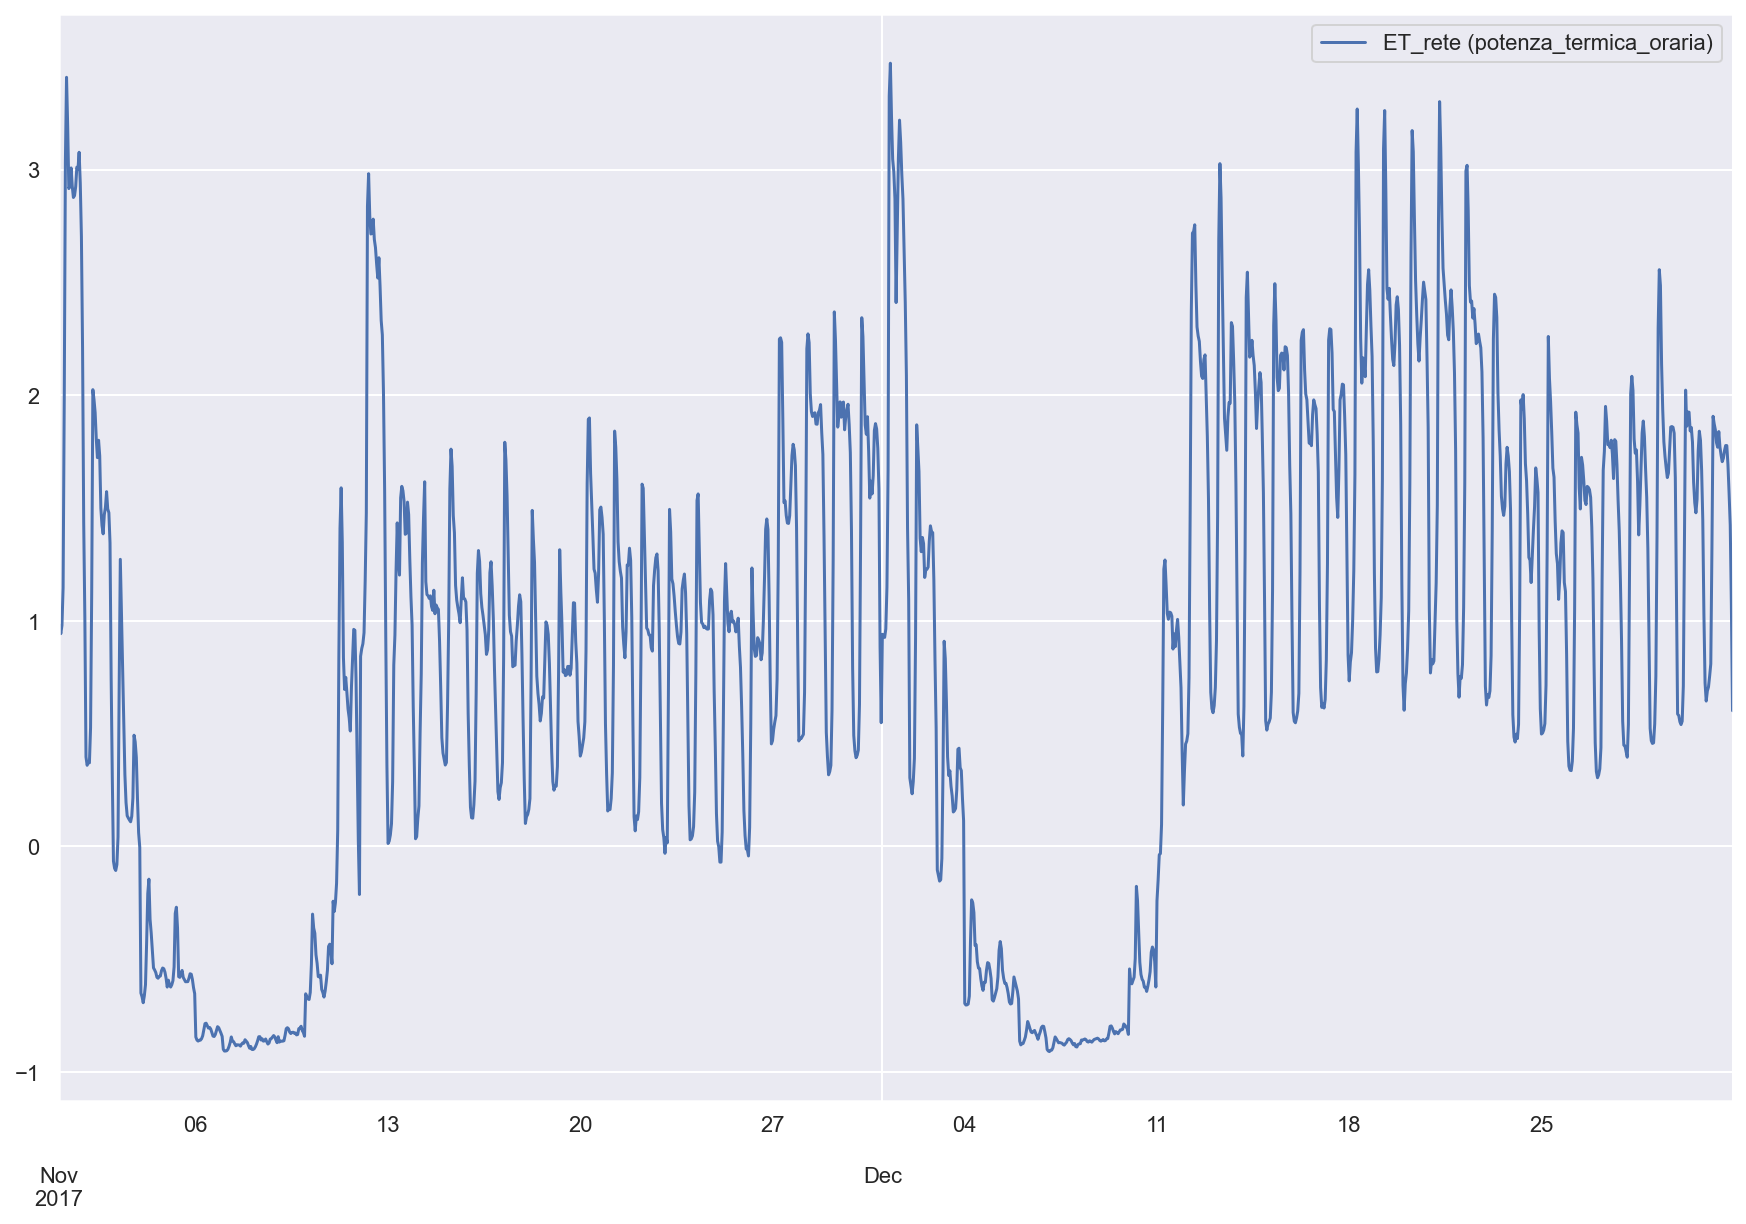

In [60]:
df_train.loc["2017-11":"2017-12"].plot()

<AxesSubplot:>

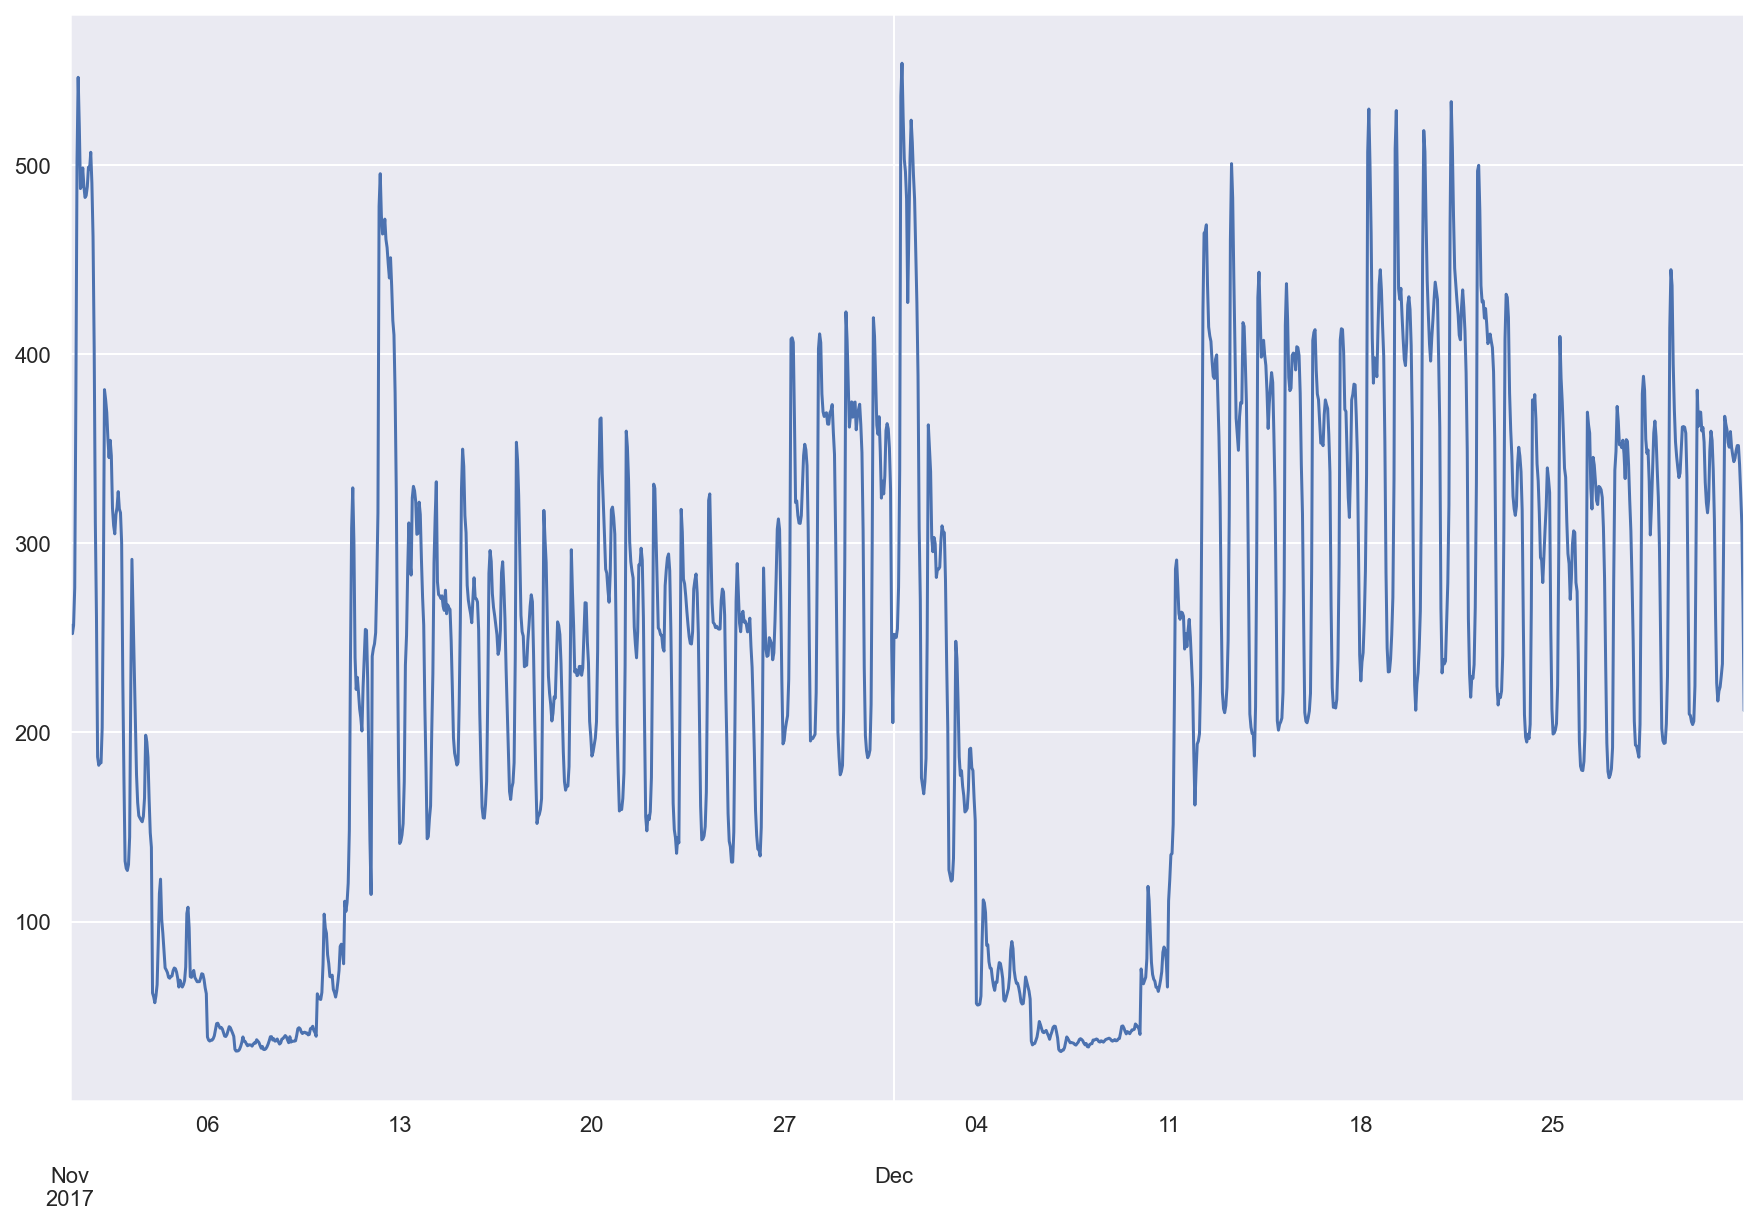

In [59]:
df["ET_rete (potenza_termica_oraria)"].loc["2017-11":"2017-12"].plot()

In [69]:
data = pd.read_csv("data/PotenzaTermicaOraria.csv", parse_dates=True, delimiter=";", index_col="Orario", decimal=",")

In [70]:
data

,ET Rete
Orario,
2014-01-01 00:00:00,78.7
2014-01-01 00:10:00,79.8
2014-01-01 00:20:00,81.4
2014-01-01 00:30:00,80.8
2014-01-01 00:40:00,82.5
...,...
NaT,NaN
NaT,NaN
NaT,NaN


<AxesSubplot:xlabel='Orario'>

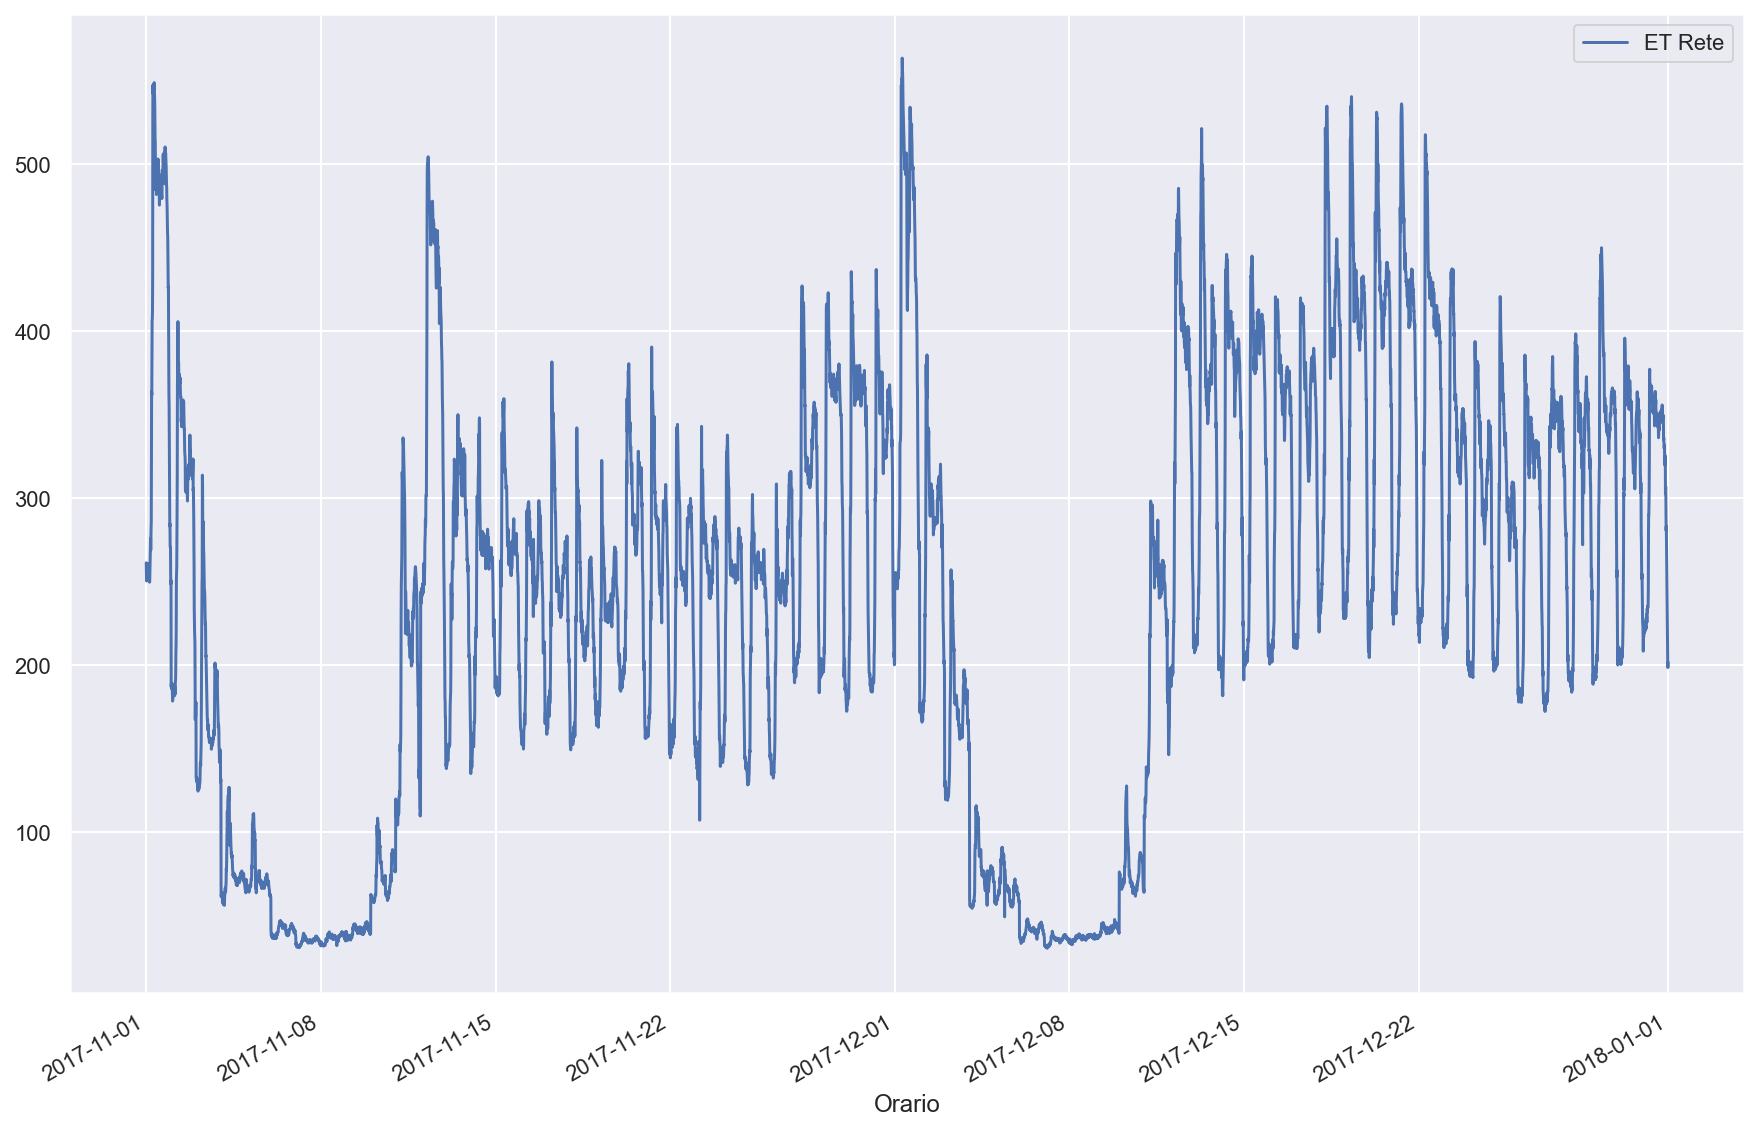

In [71]:
data.loc["2017-11":"2017-12"].plot()